Consider we're evaluating the effect of a pill given to patients, however, we give this pill to the patients mostly when they're in severe condition. On the face of it, it look like giving the pill would reduce the survival chance, but the assignment of treatment is not random, and it is based on severity.

__If we condition on or control the severity, which means we break down the population by the feature__, then the assignment of treatment on each subgroup is as good as random.

$$(Y_0, Y_1) \perp\!\!\!\perp T \mid X$$

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import graphviz as gr
from matplotlib import style
import seaborn as sns
from matplotlib import pyplot as plt
style.use("fivethirtyeight")

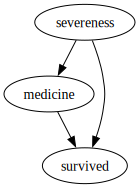

In [7]:
g = gr.Digraph()

g.edge("medicine", "survived")
g.edge("severeness", "survived")
g.edge("severeness", "medicine")

g

# Causality

In a graph A -> B -> C, 

$$A \not\!\perp\!\!\!\perp C$$

When condition on B,

$$A \!\perp\!\!\!\perp C \mid B$$

Which means when fixing the value of B, knowing A does not give more information about C.

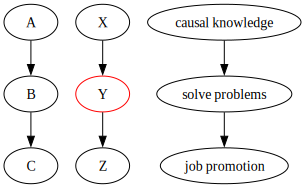

In [8]:
g = gr.Digraph()
g.edge("A", "B")
g.edge("B", "C")

g.edge("X", "Y")
g.edge("Y", "Z")
g.node("Y", "Y", color="red")


g.edge("causal knowledge", "solve problems")
g.edge("solve problems", "job promotion")

g

## Fork

In a graph where C is the common cause of both A and B.

$$A \not\!\perp\!\!\!\perp B$$

Because knowing A, also infers that B might happen. But when conditioned on C, they become independent.

$$A \!\perp\!\!\!\perp B \mid C$$

As the cause of B can be fully explained by C, thus knowing A would not bring in any more information.

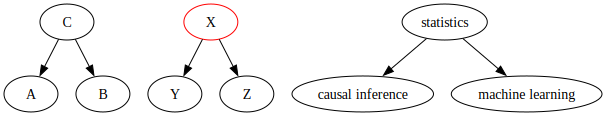

In [9]:
g = gr.Digraph()
g.edge("C", "A")
g.edge("C", "B")

g.edge("X", "Y")
g.edge("X", "Z")
g.node("X", "X", color="red")

g.edge("statistics", "causal inference")
g.edge("statistics", "machine learning")

g

## Collider

In this relationship, knowing B does not indicate A. So

$$A \perp\!\!\!\perp B$$

But if I condition on C, that I know you got promoted, then knowing your statistics level, would help me infer your flatter level. So

$$A \not\!\perp\!\!\!\perp B \mid C$$

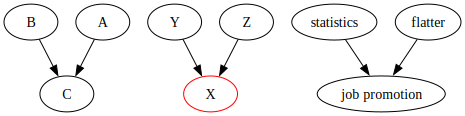

In [10]:
g = gr.Digraph()
g.edge("B", "C")
g.edge("A", "C")

g.edge("Y", "X")
g.edge("Z", "X")
g.node("X", "X", color="red")

g.edge("statistics", "job promotion")
g.edge("flatter", "job promotion")

g

## Confouders

Confounders are variables that affect both the outcome and treatment, which forms a `fork` introduced above. For example when carry an study understanding how __Education(treatment)__ affects __Income(outcome)__, the __Intelligence__ is a confounder, as people with high intelligence can make more income and meanwhile get a higher education.

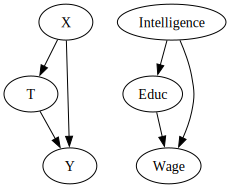

In [3]:
g = gr.Digraph()
g.edge("X", "T")
g.edge("X", "Y")
g.edge("T", "Y")

g.edge("Intelligence", "Educ"),
g.edge("Intelligence", "Wage"),
g.edge("Educ", "Wage")
g

In order to make $(Y_0, Y_1)\perp\!\!\!\perp T$, we need to block the backdoor path at __Intelligence__, but it is hard to control or measure intelligence. Condition on the a proxy like __SAT__ score would achieve the same effect, given that __Intelligence__ determines the score.

In the following graph, after controlling for __Family Income__ and __SAT__, both of which form a backdoor fork structure, we will have

$$(Y_0, Y_1)\perp\!\!\!\perp T$$

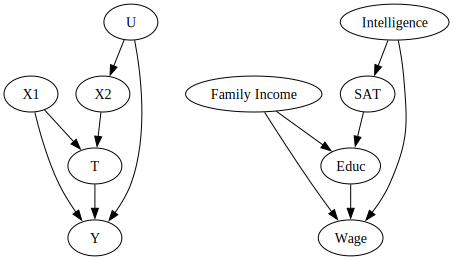

In [4]:
g = gr.Digraph()
g.edge("X1", "T")
g.edge("T", "Y")
g.edge("X2", "T")
g.edge("X1", "Y")
g.edge("U", "X2")
g.edge("U", "Y")

g.edge("Family Income", "Educ")
g.edge("Educ", "Wage")
g.edge("SAT", "Educ")
g.edge("Family Income", "Wage")
g.edge("Intelligence", "SAT")
g.edge("Intelligence", "Wage")
g

## Selection Bias
It happens when a variable is a common effect of both the treatment and outcome, which forms a __Collider__. Put in an example, consider __Education(Treatment)__ to __Wage(Outcome)__, and __Investment__. People with higher education are more likely to invest, as well as people with higer wage. In this case, investment is a common effect. Controlling on the investment will make $(Y_0, Y_1) \not\!\perp\!\!\!\perp T$.

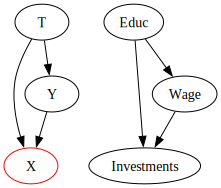

In [5]:
g = gr.Digraph()
g.edge("T", "X")
g.edge("T", "Y")
g.edge("Y", "X")
g.node("X", "X", color="red")

g.edge("Educ", "Investments")
g.edge("Educ", "Wage")
g.edge("Wage", "Investments")

g

If we control for investments, that is fix investment, taking a group of people who all invest. Since well educated people are more likely to invest, so we can infer that in this group of people, there will be more people who's well educated, so the treatment assignment becomes not random.

On another aspect, in the same group of invested people, they also more likely to have higher wage, thus the wages variablility is reduced as it should have been.

## Selection Bias(Mediator)
Another selection bias happens when condition on a mediater of the treatment. Suppose the mediator is a __White Collar__ job, people with higher education is more likely to get a white collar job.

When condition on the white collar job, suppose we have a group of people all with white collar job, the chances of them having a education is high, so again the treatment assignment would not be random.

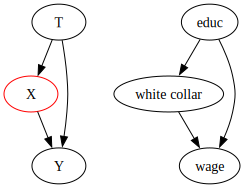

In [6]:
g = gr.Digraph()
g.edge("T", "X")
g.edge("T", "Y")
g.edge("X", "Y")
g.node("X", "X", color="red")

g.edge("educ", "white collar")
g.edge("educ", "wage")
g.edge("white collar", "wage")

g